In [1]:
import os
import matplotlib.pyplot as plt
from math import log
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
wiki_dir = '/Users/k/Docs/School/Tuebingen/Thesis/Corpuses/ShortenedWiki/'
files = [os.path.join(wiki_dir, file) for file in os.listdir(wiki_dir) if file.endswith('.txt')]

Type-Token Ratio

In [3]:
def calculate_ttr(file):
    
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    f.close()
    
    tokens = text.split()
    total_tokens = len(tokens)
    types = set(tokens)
    total_types = len(types)
    ttr = (total_types / total_tokens) * 100
    return ttr

ttr_values = {}
for file in files:
    lang = os.path.splitext(os.path.basename(file))[0].split('_')[0]
    ttr_values[lang] = calculate_ttr(file)

Moving Average Type-Token Ratio

In [5]:
def calculate_mattr(file, window_size):
    
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    f.close()
    
    tokens = text.split()
    total_tokens = len(tokens)
    
    ttr_values = []
    for i in range(total_tokens - window_size + 1):
        window = tokens[i:i + window_size]
        types = set(window)
        total_types = len(types)
        ttr = total_types / window_size
        ttr_values.append(ttr)

    mattr = sum(ttr_values) / len(ttr_values)
    return mattr

mattr_values = {}
window_size = 100  
for file in files:
    lang = os.path.splitext(os.path.basename(file))[0].split('_')[0]
    mattr_values[lang] = calculate_mattr(file, window_size)

Character Entropy

In [6]:
def log2(number):
    return log(number) / log(2)

def calculate_char_entropy(file):
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    f.close()
    
    char_freq = {}
    for char in text:
        if char in char_freq:
            char_freq[char] += 1
        else:
            char_freq[char] = 1
            
    length_sum = 0.0
    for char in char_freq:
        p = float(char_freq[char]) / len(text)
        length_sum += p * log2(p)
        
    return -length_sum

char_entropies = {}
for file in files:
    lang = os.path.splitext(os.path.basename(file))[0].split('_')[0]
    char_entropies[lang] = calculate_char_entropy(file)

Word Entropy

In [7]:
def log2(number):
    return log(number) / log(2)

def calculate_word_entropy(file):
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    f.close()
    
    word_freq = {}
    total_words = 0
    for word in text.split():
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
        total_words += 1
            
    length_sum = 0.0
    for word in word_freq:
        p = float(word_freq[word]) / total_words
        length_sum += p * log2(p)
        
    return -length_sum

word_entropies = {}
for file in files:
    lang = os.path.splitext(os.path.basename(file))[0].split('_')[0]
    word_entropies[lang] = calculate_word_entropy(file)

Dataframe

In [8]:
calculations = {
   'TTR': ttr_values,
   'MATTR': mattr_values,
   'Char Entr': char_entropies,
   'Word Entr': word_entropies
}

for label, dic in calculations.items():
    calculations[label] = pd.Series(dic)

df = pd.DataFrame(calculations)
# df = pd.DataFrame(calculations).T
print(df)

          TTR     MATTR  Char Entr  Word Entr
eo   9.687041  0.697294   4.199774  11.712463
en   4.756099  0.691067   4.150657  11.110376
de   9.434845  0.752646   4.209513  12.084622
fr   5.604354  0.703206   4.149414  11.101759
ia   6.892730  0.666997   4.096957  11.411335
lfn  6.003457  0.621196   3.980016  10.313963


Principle Component Analysis

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=0.95)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df.index = df.index

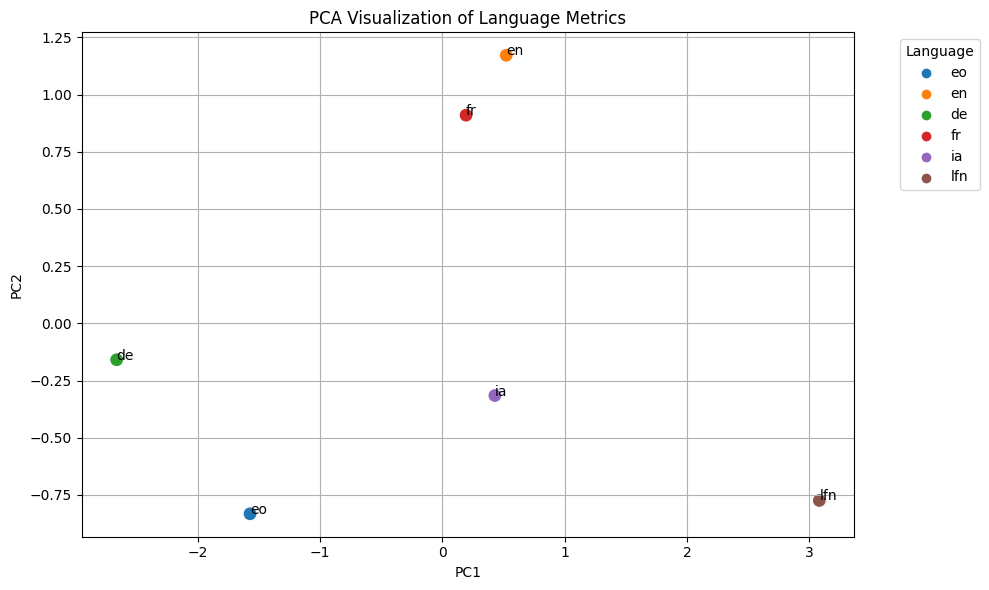

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=pca_df.index, s=100)

for i, language in enumerate(pca_df.index):
    plt.annotate(language, (pca_df['PC1'][i], pca_df['PC2'][i]))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization of Language Metrics')
plt.grid(True)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()